In [1]:
import pdfplumber
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from string import punctuation
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
## Uždavinys 1: Spam ir ne-spam klasifikavimas

# Jūs turite el. laiškų rinkinį, kuriame yra paženklinti el. laiškai kaip "spam" arba "ne-spam". 
# Naudokite Naive Bayes algoritmą, kad sukurtumėte modelį, kuris galėtų klasifikuoti naujus el. laiškus.

# Naudokite duomenis iš šio šaltinio: https://archive.ics.uci.edu/dataset/228/sms+spam+collection

# Įkelkite duomenis ir atlikite išankstinį apdorojimą (aptvarkykite duomenis, pasirinkite tik tai ko jums reikia).
# Padalinkite duomenis į mokymosi ir testavimo rinkinius.
# Sukurkite Naive Bayes modelį naudojant scikit-learn.
# Įvertinkite modelio tikslumą naudodami testavimo rinkinį.

In [10]:
with open('SMSSpamCollection.txt', 'r', encoding='utf-8') as f:
    sms = f.read()

straipsniai = sms.split(' ')

ham_list = []
spam_list = []


lines = sms.split('\n')


for x in lines:
    if x.startswith("ham\t"):
        ham_list.append(x[4:])
    elif x.startswith("spam\t"):
        spam_list.append(x[5:])

ham_list = ham_list[:747]

print(len(ham_list))
print(len(spam_list))

data = ham_list + spam_list

labels = ["ham"] * len(ham_list) + ['spam'] * len(spam_list)

X_train, X_test, y_train, y_test = train_test_split(data, labels)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

def guess_ham_or_scam(text):
    return model.predict([text])

print(guess_ham_or_scam('Congrats you are the winer'))
print(guess_ham_or_scam('Hello Sussan how are you?'))
print(guess_ham_or_scam('asddss adfdfs asd adsa dfdgsd s dfs'))


747
747
0.9545454545454546
['spam']
['ham']
['spam']


In [4]:
## Uždavinys 2

# Turite Twitter žinutes, kurios yra paženklintos kaip "positive" arba "negative". 
# Naudokite Naive Bayes algoritmą, kad sukurtumėte modelį, kuris galėtų nustatyti naujų žinučių segmentą (ar žinutė yra negative ar positive).

# Naudokite duomenis iš šio šaltinio: https://www.kaggle.com/datasets/kazanova/sentiment140

In [5]:
with open('training.1600000.processed.noemoticon.csv', 'r', encoding='utf-8') as f:
    messages = f.read()

positive = []
negative = []

lines = messages.split('\n')

for line in lines:
    parts = line.strip().split('","')
    if parts[0].strip('"') == '0':
        negative.append(parts[-1].strip('"'))  
    elif parts[0].strip('"') == '4':
        positive.append(parts[-1].strip('"'))  

data = negative + positive

labels = ["negative"] * len(negative) + ['positive'] * len(positive)

X_train, X_test, y_train, y_test = train_test_split(data, labels)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.7724125


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.7718075


In [7]:
def guess_comment(text):
    return model.predict([text])

print(guess_comment('Today is bad day because of the rain'))
print(guess_comment('You are ugly'))
print(guess_comment('You are beutifull'))
print(guess_comment('Im happy because i bought new car'))


['negative']
['negative']
['positive']
['positive']


In [8]:
## Uždavinys 3

# Turite vyno kokybės duomenų rinkinį, kur vynai yra paženklinti kaip "gera" arba "bloga" kokybė. 
# Naudokite Naive Bayes algoritmą, kad sukurtumėte modelį, kuris galėtų klasifikuoti vyno kokybę.

# Naudokite duomenis iš šio šaltinio: https://archive.ics.uci.edu/dataset/186/wine+quality

In [9]:
wine_lst = pd.read_csv('winequality_red.csv', sep=';')

def converter(var):
    integer = [int(x) for x in var]
    return integer

wine_lst_quality = converter(wine_lst['quality'])
# print(wine_lst_quality)

good_quality = []
bad_quality = []

for wine in wine_lst_quality:
    if wine >= 6:
        good_quality.append(wine)
    else:
        bad_quality.append(wine)

good_quality = good_quality[:744]
print(len(good_quality))
print(len(bad_quality))



data = good_quality + bad_quality

labels = ["good_quality"] * len(good_quality) + ['bad_quality'] * len(bad_quality)

X = [[x] for x in data]

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

model = make_pipeline(StandardScaler(), RandomForestClassifier())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

744
744
1.0


In [ ]:
## Uždavinys 4

# Turite namų kainų duomenų rinkinį, kuriame pateikiamos įvairios savybės (plotas, kambarių skaičius ir t.t.). 
# Naudokite Linear Regression algoritmą, kad sukurtumėte modelį, kuris galėtų prognozuoti namų kainas.

# Naudokite duomenis iš šio šaltinio: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

In [15]:
column_names = [ "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv('housing.csv', sep='\s+', names=column_names)
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sarun\AppData\Local\Temp\ipykernel_9524\3068016416.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('housing.csv', sep='\s+', names=column_names)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


24.291119474973534


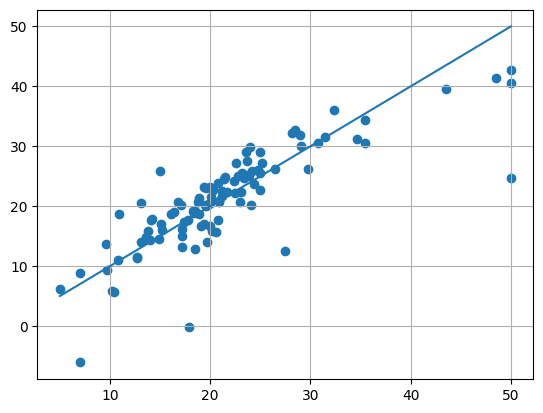

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
X = df.drop(columns=['MEDV'])
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# print(y_pred)
mse = mean_squared_error(y_pred, y_test)
print(mse)
plt.scatter(y_test, y_pred, )
# plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.grid()
plt.show()